In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
# Import functions and data
from netopt import netopt, print_dict, plot_map
from data_structures import import_data, show_data, set_capacity, set_all_capacities, set_fixed_cost, scale_demand, scale_all_demands, set_demand, set_all_demands, calculate_dm
from projectwork_data import warehouses, customers_as_is, customers_to_be


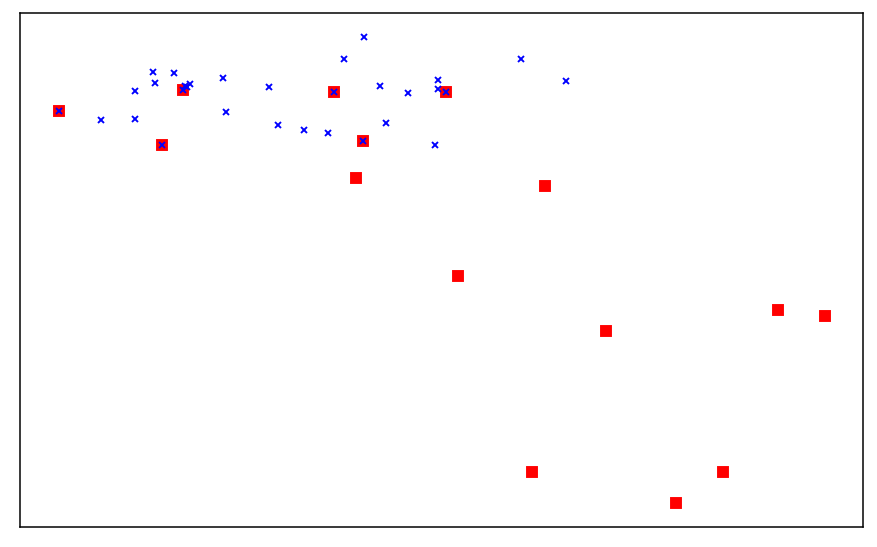

In [15]:

plot_map(warehouses=warehouses,
         customers=customers_as_is,
         warehouse_markersize=5,
         warehouse_marker='s',
         warehouse_markercolor='red',
         customer_markersize=3,
         customer_marker='x',
         customer_markercolor='blue')

dist = calculate_dm(warehouses=warehouses,
                    customers=customers_to_be)

In [13]:
?netopt

In [33]:
show_data(customers_as_is)

|    |   Id | Identifier         | City               | State   | Zipcode   |   Latitude |   Longitude |   Demand |
|---:|-----:|:-------------------|:-------------------|:--------|:----------|-----------:|------------:|---------:|
|  0 |    0 | Milan              | Milan              |         |           |    45.4669 |      9.19   |        0 |
|  1 |    1 | Turin              | Turin              |         |           |    45.0667 |      7.7    |        0 |
|  2 |    2 | Genoa              | Genoa              |         |           |    44.4072 |      8.934  |        0 |
|  3 |    3 | Bologna            | Bologna            |         |           |    44.4939 |     11.3428 |        0 |
|  4 |    4 | Venice             | Venice             |         |           |    45.4397 |     12.3319 |        0 |
|  5 |    5 | Verona             | Verona             |         |           |    45.4386 |     10.9928 |        0 |
|  6 |    6 | Padova             | Padova             |         |       

In [28]:
scale_demand(customers_as_is, 0, .5)

In [30]:
set_demand(customers_as_is, 0, 2000)

In [32]:
set_all_demands(customers_as_is, 0)